In [36]:
import pandas as pd

#leo los dattos correspondientes
df1 = pd.read_excel("vehículos.xlsx")
df2 = pd.read_excel("DGT.xlsx")


In [47]:
df2.columns

Index(['Codigo INE', 'Municipio', 'Provincia', 'Comunidad Autonoma',
       'Bicicletas Fallecidos', 'Bicicletas Heridos Graves',
       'Bicicletas Heridos Leves', 'Ciclomotores Fallecidos',
       'Ciclomotores Heridos Graves', 'Ciclomotores Heridos Leves',
       'Motocicletas Fallecidos', 'Motocicletas Heridos Graves',
       'Motocicletas Heridos Leves', 'Turismos Fallecidos',
       'Turismos Heridos Graves', 'Turismos Heridos Leves',
       'Furgonetas Fallecidos', 'Furgonetas Heridos Graves',
       'Furgonetas Heridos Leves', 'Camiones Fallecidos',
       'Camiones Heridos Graves', 'Camiones Heridos Leves',
       'Autobus Fallecidos', 'Autobus Heridos Graves', 'Autobus Heridos Leves',
       'Otros Fallecidos', 'Otros Heridos Graves', 'Otros Heridos Leves',
       'Peatones Fallecidos', 'Peatones Heridos Graves',
       'Peatones Heridos Leves', 'N Accidentes con Victimas', 'Fallecidos',
       'Heridos Hospitalizados', 'Heridos no Hospitalizados', 'Latitud',
       'Longitud

In [38]:
import pandas as pd
import numpy as np

# 1. Tratamiento de Valores Faltantes
# Para variables numéricas
for column in df1.select_dtypes(include=[np.number]).columns:
    df1[column].fillna(df1[column].median(), inplace=True)

for column in df2.select_dtypes(include=[np.number]).columns:
    df2[column].fillna(df2[column].median(), inplace=True)

# Para variables categóricas (ejemplo con 'Municipio')
df1['Municipio'].fillna('Desconocido', inplace=True)
df2['Municipio'].fillna('Desconocido', inplace=True)

# 2. Limpieza y Estandarización de Datos
# Asegúrate de que 'Latitud' y 'Longitud' sean numéricas
df1['Latitud'] = pd.to_numeric(df1['Latitud'], errors='coerce')
df1['Longitud'] = pd.to_numeric(df1['Longitud'], errors='coerce')

df2['Latitud'] = pd.to_numeric(df2['Latitud'], errors='coerce')
df2['Longitud'] = pd.to_numeric(df2['Longitud'], errors='coerce')
# 3. Unión de los Datasets




C:\Users\lolar\AppData\Roaming\Python\Python312\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\lolar\AppData\Local\Temp\ipykernel_32232\1323685006.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Desconocido' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df1['Municipio'].fillna('Desconocido', inplace=True)


In [46]:
df = pd.merge(df1, df2, on='Codigo INE', how='inner')


# 4. Agrupación y Creación de Nuevas Variables
# Ejemplo: Calculando 'Fallecidos por 1000 habitantes'
df['Fallecidos 100 hab'] = df['Fallecidos'] / (df['Población Total'] / 1000)



In [48]:
# Suma de fallecidos, heridos graves y heridos leves por tipo de vehículo
df['FallecidosTotal'] = df[['Bicicletas Fallecidos', 'Ciclomotores Fallecidos', 'Motocicletas Fallecidos', 'Turismos Fallecidos', 'Furgonetas Fallecidos', 'Camiones Fallecidos', 'Autobus Fallecidos', 'Otros Fallecidos']].sum(axis=1)

df['HeridosGravesTotal'] = df[['Bicicletas Heridos Graves', 'Ciclomotores Heridos Graves', 'Motocicletas Heridos Graves', 'Turismos Heridos Graves', 'Furgonetas Heridos Graves', 'Camiones Heridos Graves', 'Autobus Heridos Graves', 'Otros Heridos Graves']].sum(axis=1)

df['HeridosLevesTotal'] = df[['Bicicletas Heridos Leves', 'Ciclomotores Heridos Leves', 'Motocicletas Heridos Leves', 'Turismos Heridos Leves', 'Furgonetas Heridos Leves', 'Camiones Heridos Leves', 'Autobus Heridos Leves', 'Otros Heridos Leves']].sum(axis=1)


In [49]:
df

,Codigo INE,Municipio_x,Provincia_x,Comunidad Autonoma_x,Población Total,Poblacion Hombres,Poblacion Mujeres,Conductores Hombres,Conductoras Mujeres,Censo Conductores,...,Fallecidos,Heridos Hospitalizados,Heridos no Hospitalizados,Latitud_y,Longitud_y,Año_y,Fallecidos 100 hab,FallecidosTotal,HeridosGravesTotal,HeridosLevesTotal
0,1000,Desconocido,Araba/Álava,País Vasco,519.0,273.0,246.0,191.0,111.0,300.0,...,0.0,0.0,0.0,42.830000,-2.750000,2018,0.000000,0.0,0.0,0.0
1,1000,Desconocido,Araba/Álava,País Vasco,519.0,273.0,246.0,191.0,111.0,300.0,...,0.0,0.0,0.0,42.833300,-2.750000,2019,0.000000,0.0,0.0,0.0
2,1000,Desconocido,Araba/Álava,País Vasco,519.0,273.0,246.0,191.0,111.0,300.0,...,0.0,0.0,0.0,42.833333,-2.750000,2020,0.000000,0.0,0.0,0.0
3,1000,Desconocido,Araba/Álava,País Vasco,519.0,273.0,246.0,191.0,111.0,300.0,...,0.0,0.0,0.0,42.833333,-2.750000,2021,0.000000,0.0,0.0,0.0
4,1000,Desconocido,Araba/Álava,País Vasco,519.0,273.0,246.0,191.0,111.0,300.0,...,0.0,0.0,0.0,42.830000,-2.750000,2018,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286305,50903,Desconocido,Zaragoza,Aragón,2827.0,1426.0,1401.0,740.0,495.0,1235.0,...,0.0,0.0,0.0,41.690000,-0.770000,2018,0.000000,0.0,0.0,0.0
286306,50903,Desconocido,Zaragoza,Aragón,2827.0,1426.0,1401.0,740.0,495.0,1235.0,...,0.0,0.0,0.0,41.685600,-0.773900,2019,0.000000,0.0,0.0,0.0
286307,50903,Desconocido,Zaragoza,Aragón,2827.0,1426.0,1401.0,740.0,495.0,1235.0,...,0.0,0.0,0.0,41.685556,-0.773889,2020,0.000000,0.0,0.0,0.0
286308,50903,Desconocido,Zaragoza,Aragón,2827.0,1426.0,1401.0,740.0,495.0,1235.0,...,1.0,0.0,4.0,41.685556,-0.773889,2021,0.353732,1.0,0.0,2.0


In [50]:
# Asegúrate de que 'Población Total' y 'Parque Total' no tienen ceros o valores NaN para evitar divisiones por cero
df['Población Total'].replace(0, np.nan, inplace=True)
df['Parque Total'].replace(0, np.nan, inplace=True)

# Accidentes por cantidad de vehículos (asumiendo que 'N Accidentes con Victimas' es el total de accidentes)
df['Accidentes_por_cantidad_vehiculos'] = df['N Accidentes con Victimas'] / df['Parque Total']


In [ ]:
# Proporción de conductores hombres/mujeres
df['Proporción_Conductores_Hombres'] = df['Conductores Hombres'] / (df['Conductores Hombres'] + df['Conductoras Mujeres'])
df['Proporción_Conductoras_Mujeres'] = df['Conductoras Mujeres'] / (df['Conductores Hombres'] + df['Conductoras Mujeres'])

# Antigüedad promedio de los vehículos (asumiendo que tienes esta información como 'Antiguedad Media del Parque')
# La variable ya debe estar calculada en tu dataset. Si no, necesitarías definir cómo calcularla basado en tus datos disponibles.


In [55]:
import matplotlib.pyplot as plt

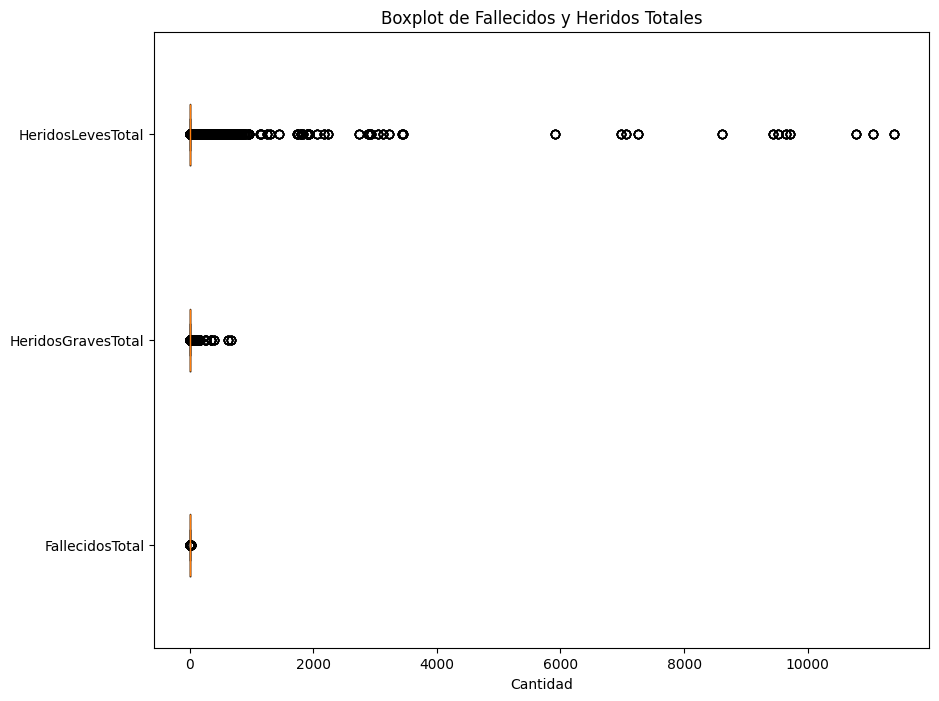

In [56]:
# Crear boxplots para múltiples variables
variables = ['FallecidosTotal', 'HeridosGravesTotal', 'HeridosLevesTotal']
data_to_plot = [df[var].dropna() for var in variables]

plt.figure(figsize=(10, 8))
plt.boxplot(data_to_plot, vert=False, labels=variables)
plt.title('Boxplot de Fallecidos y Heridos Totales')
plt.xlabel('Cantidad')

plt.show()

